# Exploratory Data Analysis

In [1]:
# !pip install statsmodels

In [2]:
#  Import Dependencies
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
import plotly.express as px
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Looking at the original CSV
df = pd.read_csv('Resources/Sales_Product_Price_by_Store.csv')
df.head()

,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
0,1,1,2/5/2010,False,9.99,7.99,245
1,1,1,2/12/2010,True,9.99,7.99,453
2,1,1,2/19/2010,False,9.99,7.99,409
3,1,1,2/26/2010,False,9.99,7.99,191
4,1,1,3/5/2010,False,9.99,9.99,145


In [4]:
# Check for null values
df.isnull().sum()

Store                0
Product              0
Date                 0
Is_Holiday           0
Base Price           0
Price                0
Weekly_Units_Sold    0
dtype: int64

In [5]:
# Convert Date to Datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Add weekly_sales dollars ($), Gross Profit
df['weekly_sales'] = df['Price'] * df['Weekly_Units_Sold']

# Set Date as Index
df.set_index('Date', inplace=True)

# Add year column
df['year'] = df.index.year

# Add month column
df['month'] = df.index.month

# Add day column
df['day'] = df.index.day

# Add week of year column
df['week_of_year'] = df.index.weekofyear

df.head()

,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales,year,month,day,week_of_year
Date,,,,,,,,,,,
2010-02-05,1,1,False,9.99,7.99,245,1957.55,2010,2,5,5
2010-02-12,1,1,True,9.99,7.99,453,3619.47,2010,2,12,6
2010-02-19,1,1,False,9.99,7.99,409,3267.91,2010,2,19,7
2010-02-26,1,1,False,9.99,7.99,191,1526.09,2010,2,26,8
2010-03-05,1,1,False,9.99,9.99,145,1448.55,2010,3,5,9


In [6]:
# All stores are 429 weeks beginning 2/5/2010 and ending 10/26/2012. This is 143 weeks of data for 9 stores and 3 products. 
# The data is evenly distributed. No gaps or staggered start and stop dates. 
df[df['Store']==10]

,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales,year,month,day,week_of_year
Date,,,,,,,,,,,
2010-02-05,10,1,False,9.99,7.99,395,3156.05,2010,2,5,5
2010-02-12,10,1,True,9.99,7.99,665,5313.35,2010,2,12,6
2010-02-19,10,1,False,9.99,7.99,489,3907.11,2010,2,19,7
2010-02-26,10,1,False,9.99,7.99,330,2636.70,2010,2,26,8
2010-03-05,10,1,False,9.99,9.99,244,2437.56,2010,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,10,3,False,19.99,19.99,133,2658.67,2012,9,28,39
2012-10-05,10,3,False,19.99,19.99,133,2658.67,2012,10,5,40
2012-10-12,10,3,False,19.99,19.99,127,2538.73,2012,10,12,41


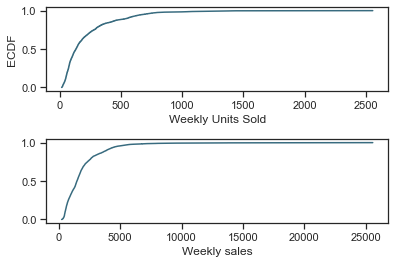

In [7]:
# empirical Cummulative Distribution Function, eCDF (to get first impression on continuous variables)
sns.set(style = "ticks")
c = '#386B7F' 
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=2.0)
plt.subplot(211)
cdf = ECDF(df['Weekly_Units_Sold'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly Units Sold'); plt.ylabel('ECDF');

plt.subplot(212)
cdf = ECDF(df['weekly_sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly sales');

* Although in the best week, a store sold more than 2500 units, about 80% of the time, weekly units sold did not exceed 500. 
* Although the highest weekly sales exceeded 25K dollars, over 90% of the data had weekly sales less than 5K dollars. 

In [8]:
# Take a look at the average weekly sales by store
df.groupby('Store')['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
1,429.0,1789.414172,900.074226,769.65,1208.90,1659.17,1957.20,6816.59
2,429.0,2469.447413,1328.162884,1143.48,1579.21,2215.08,2756.55,9110.00
3,429.0,670.924009,366.816321,229.77,459.77,619.69,730.78,2650.00
4,429.0,3078.462145,1746.147872,1099.45,1818.18,2626.61,3837.51,13753.12
5,429.0,588.922984,242.628977,285.87,461.23,519.74,613.53,2264.97
6,429.0,2066.705082,1163.284768,890.19,1418.58,1758.40,2156.40,7936.03
7,429.0,955.115058,489.084883,389.61,649.35,857.61,1041.51,3270.00
8,429.0,1352.094056,811.326288,516.53,846.23,1275.87,1491.51,6656.67
10,429.0,4093.407249,3130.087191,1483.65,2462.88,3707.81,4510.47,25570.00


In [9]:
# Look at Units sold by store. 
df.groupby('Store')['Weekly_Units_Sold'].sum()

Store
1      86699
2     121465
3      31689
4     158718
5      27300
6      97698
7      44027
8      65273
10    200924
Name: Weekly_Units_Sold, dtype: int64

* Store 10 has the hightest average weekly sales among all 9 stores, also Store 10 has the most total weekly units sold.
* Store 5 has the lowest average weekly sales. 
* It appears that store 10 is the most selling and crowded one. 

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:643: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



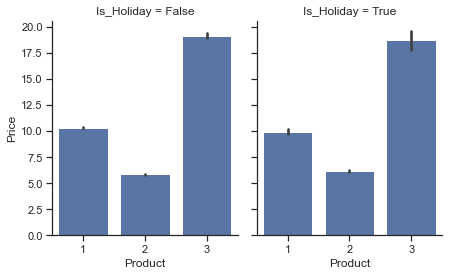

In [10]:
# Plot product price dependent upon Holiday. 
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Price");

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:643: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



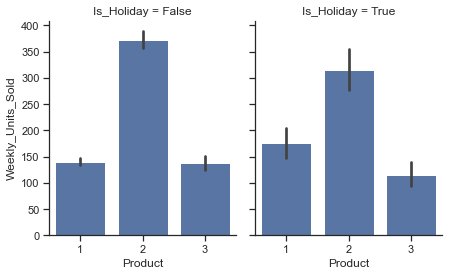

In [11]:
# Plot units sold dependent on holiday. 
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Weekly_Units_Sold");

* Product 2 is the cheapest product among all the three products, and it sells the most.
* Product 3 is the most expensive product among all the three products. 
* Additionally, product price did not change during holidays (either it was on promotion or it was not, promotion is independent of Holiday status.)

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2056

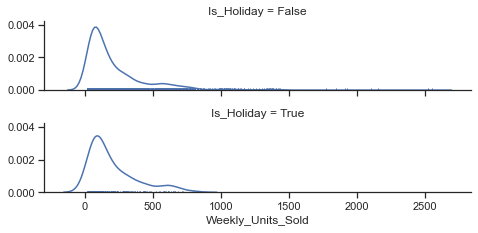

In [12]:
g = sns.FacetGrid(df, row="Is_Holiday",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "Weekly_Units_Sold", hist=False, rug=True);

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



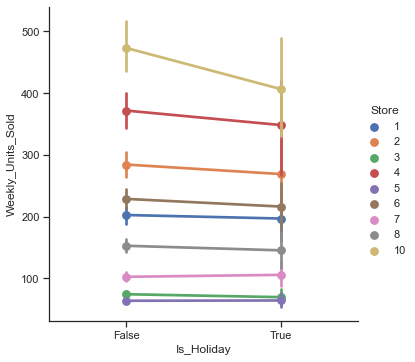

In [13]:
# Looking at units sold holiday vs non-holiday per store. 
sns.factorplot(data= df, 
               x= 'Is_Holiday',
               y= 'Weekly_Units_Sold',
               hue= 'Store');

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



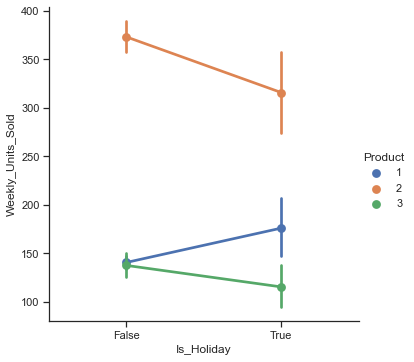

In [14]:
# Product sold holiday vs non-holiday 
sns.factorplot(data= df, 
               x= 'Is_Holiday',
               y= 'Weekly_Units_Sold',
               hue= 'Product');

* It does not seem that holidays have a positive impact for the business. For most of the stores, weekly unit sold during the holiday is as same as the normal days, while store 10 had a decrease during the holidays.
* Weekly units sold for product 1 had a slightly increase during the holidays, while product 2 and product 3 had a decrease during the holidays.

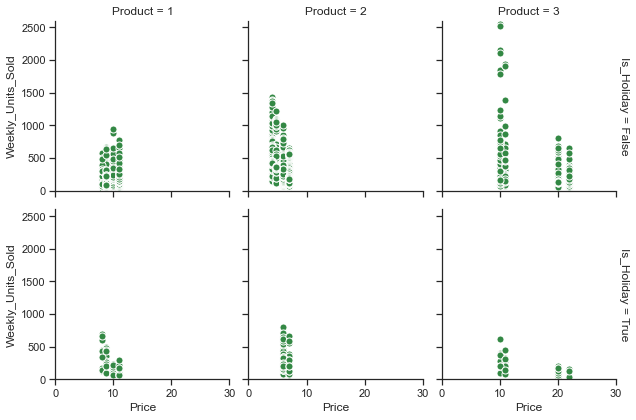

In [15]:
# PLooking at product units sold based on price and holiday. 
g = sns.FacetGrid(df, col="Product", row="Is_Holiday", margin_titles=True, height=3)
g.map(plt.scatter, "Price", "Weekly_Units_Sold", color="#338844", edgecolor="white", s=50, lw=1)
g.set(xlim=(0, 30), ylim=(0, 2600));

* Every product has more than one prices, both at holidays and normal days. The assumption is that one is regular price, another is promotional price.
* The price gap for product 3 is huge, it was slashed to almost 50% off during promotions.
* Product 3 made the most sales during non-holidays.

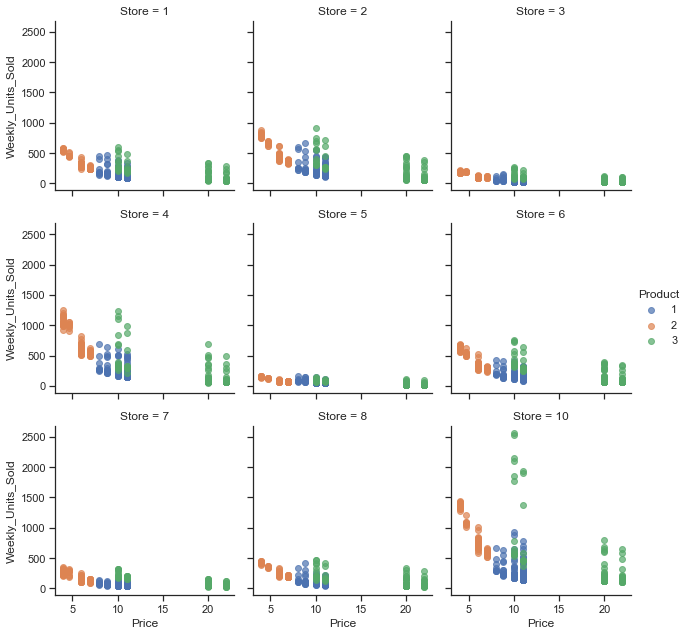

In [16]:
# Looking at product in each store vs units sold and price. 
g = sns.FacetGrid(df, col="Store", hue="Product", margin_titles=True, col_wrap=3)
g.map(plt.scatter, 'Price', 'Weekly_Units_Sold', alpha=.7)
g.add_legend();

* All of these 9 stores carry these 3 products. They all seem to have similar kind of discount promotions. However, product 3 sells the most units during promotions at store 10.

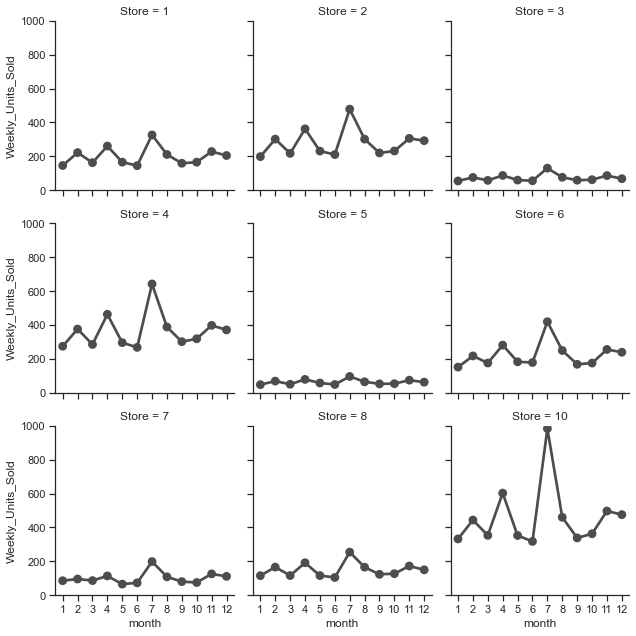

In [17]:
# Looking for yearly seasonality per store. 
g = sns.FacetGrid(df, col="Store", col_wrap=3, height=3, ylim=(0, 1000))
g.map(sns.pointplot, "month", "Weekly_Units_Sold", color=".3", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

* Every store has somewhat seasonality, store 10 has the most obvious seasonal pattern.

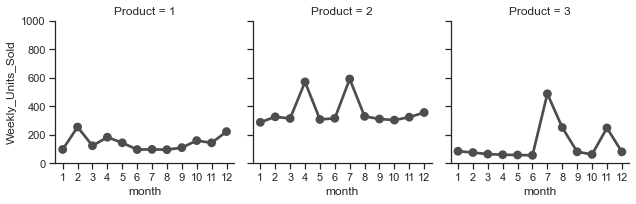

In [18]:
# Looking at seasonality per product
g = sns.FacetGrid(df, col="Product", col_wrap=3, height=3, ylim=(0, 1000))
g.map(sns.pointplot, "month", "Weekly_Units_Sold", color=".3", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

* Every product has somewhat seasonality, product 2 has two peak seasons per year and product 3 has one.

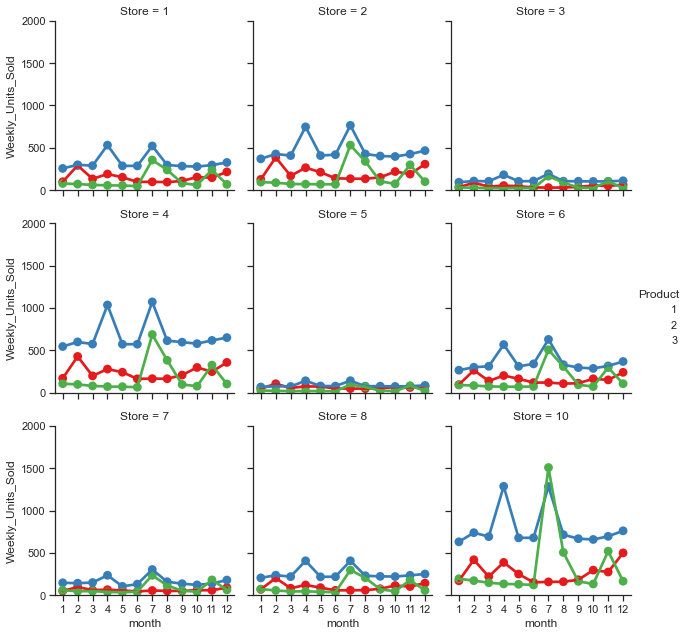

In [19]:
# Looking at seasonality per product per store in units sold. 
g = sns.FacetGrid(df, col="Store", col_wrap=3, height=3, ylim=(0, 2000), hue='Product', palette="Set1")
g.map(sns.pointplot, "month", "Weekly_Units_Sold", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12], alpha=.7)
g.add_legend();

* In general, product 2 sells more units per week than the other products in every store.
* Once a while, product 3 would exceed product 2 at store 10.

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:132: UserWarning:

The handle <matplotlib.patches.Patch object at 0x000001809F7604A8> has a label of '_nolegend_' which cannot be automatically added to the legend.

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:132: UserWarning:

The handle <matplotlib.patches.Patch object at 0x0000018098E226D8> has a label of '_nolegend_' which cannot be automatically added to the legend.

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:132: UserWarning:

The handle <matplotlib.patches.Patch object at 0x0000018098E3A1D0> has a label of '_nolegend_' which cannot be automatically added to the legend.



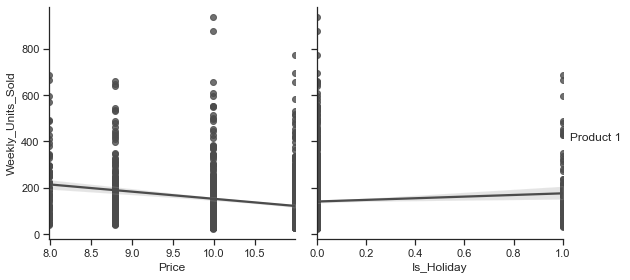

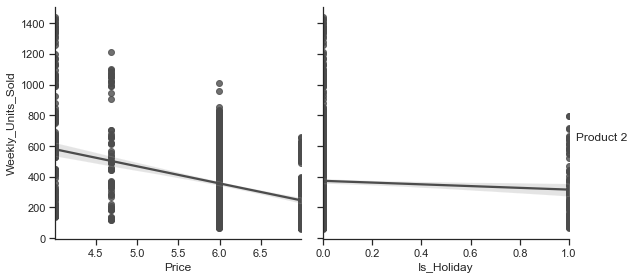

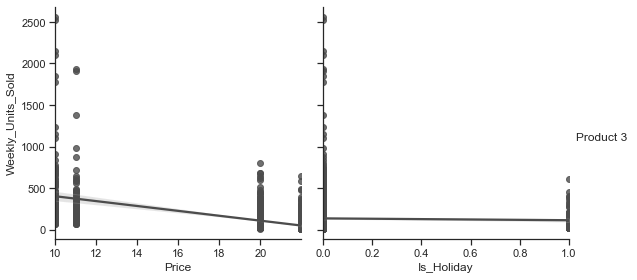

In [43]:
# How holiday and price effect sales. 
for i in range(1,4):
    g = sns.PairGrid(df[df['Product']==i], y_vars=["Weekly_Units_Sold"], x_vars=["Price", "Is_Holiday"], height=4)
    g.map(sns.regplot, color=".3")
    g.add_legend(title=f"Product {i}")

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:132: UserWarning:

The handle <matplotlib.patches.Patch object at 0x000001809F2578D0> has a label of '_nolegend_' which cannot be automatically added to the legend.



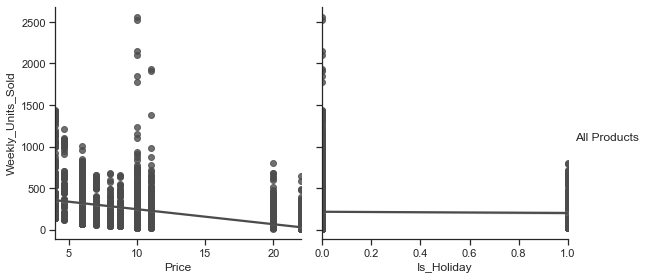

In [44]:
# How holiday and price effect sales. 
g = sns.PairGrid(df, y_vars=["Weekly_Units_Sold"], x_vars=["Price", "Is_Holiday"], height=4)
g.map(sns.regplot, color=".3")
g.add_legend(title=f"All Products")

* The cheaper the price, the more weekly units were sold.
* Is holiday or not has nothing to do with the unit sold.

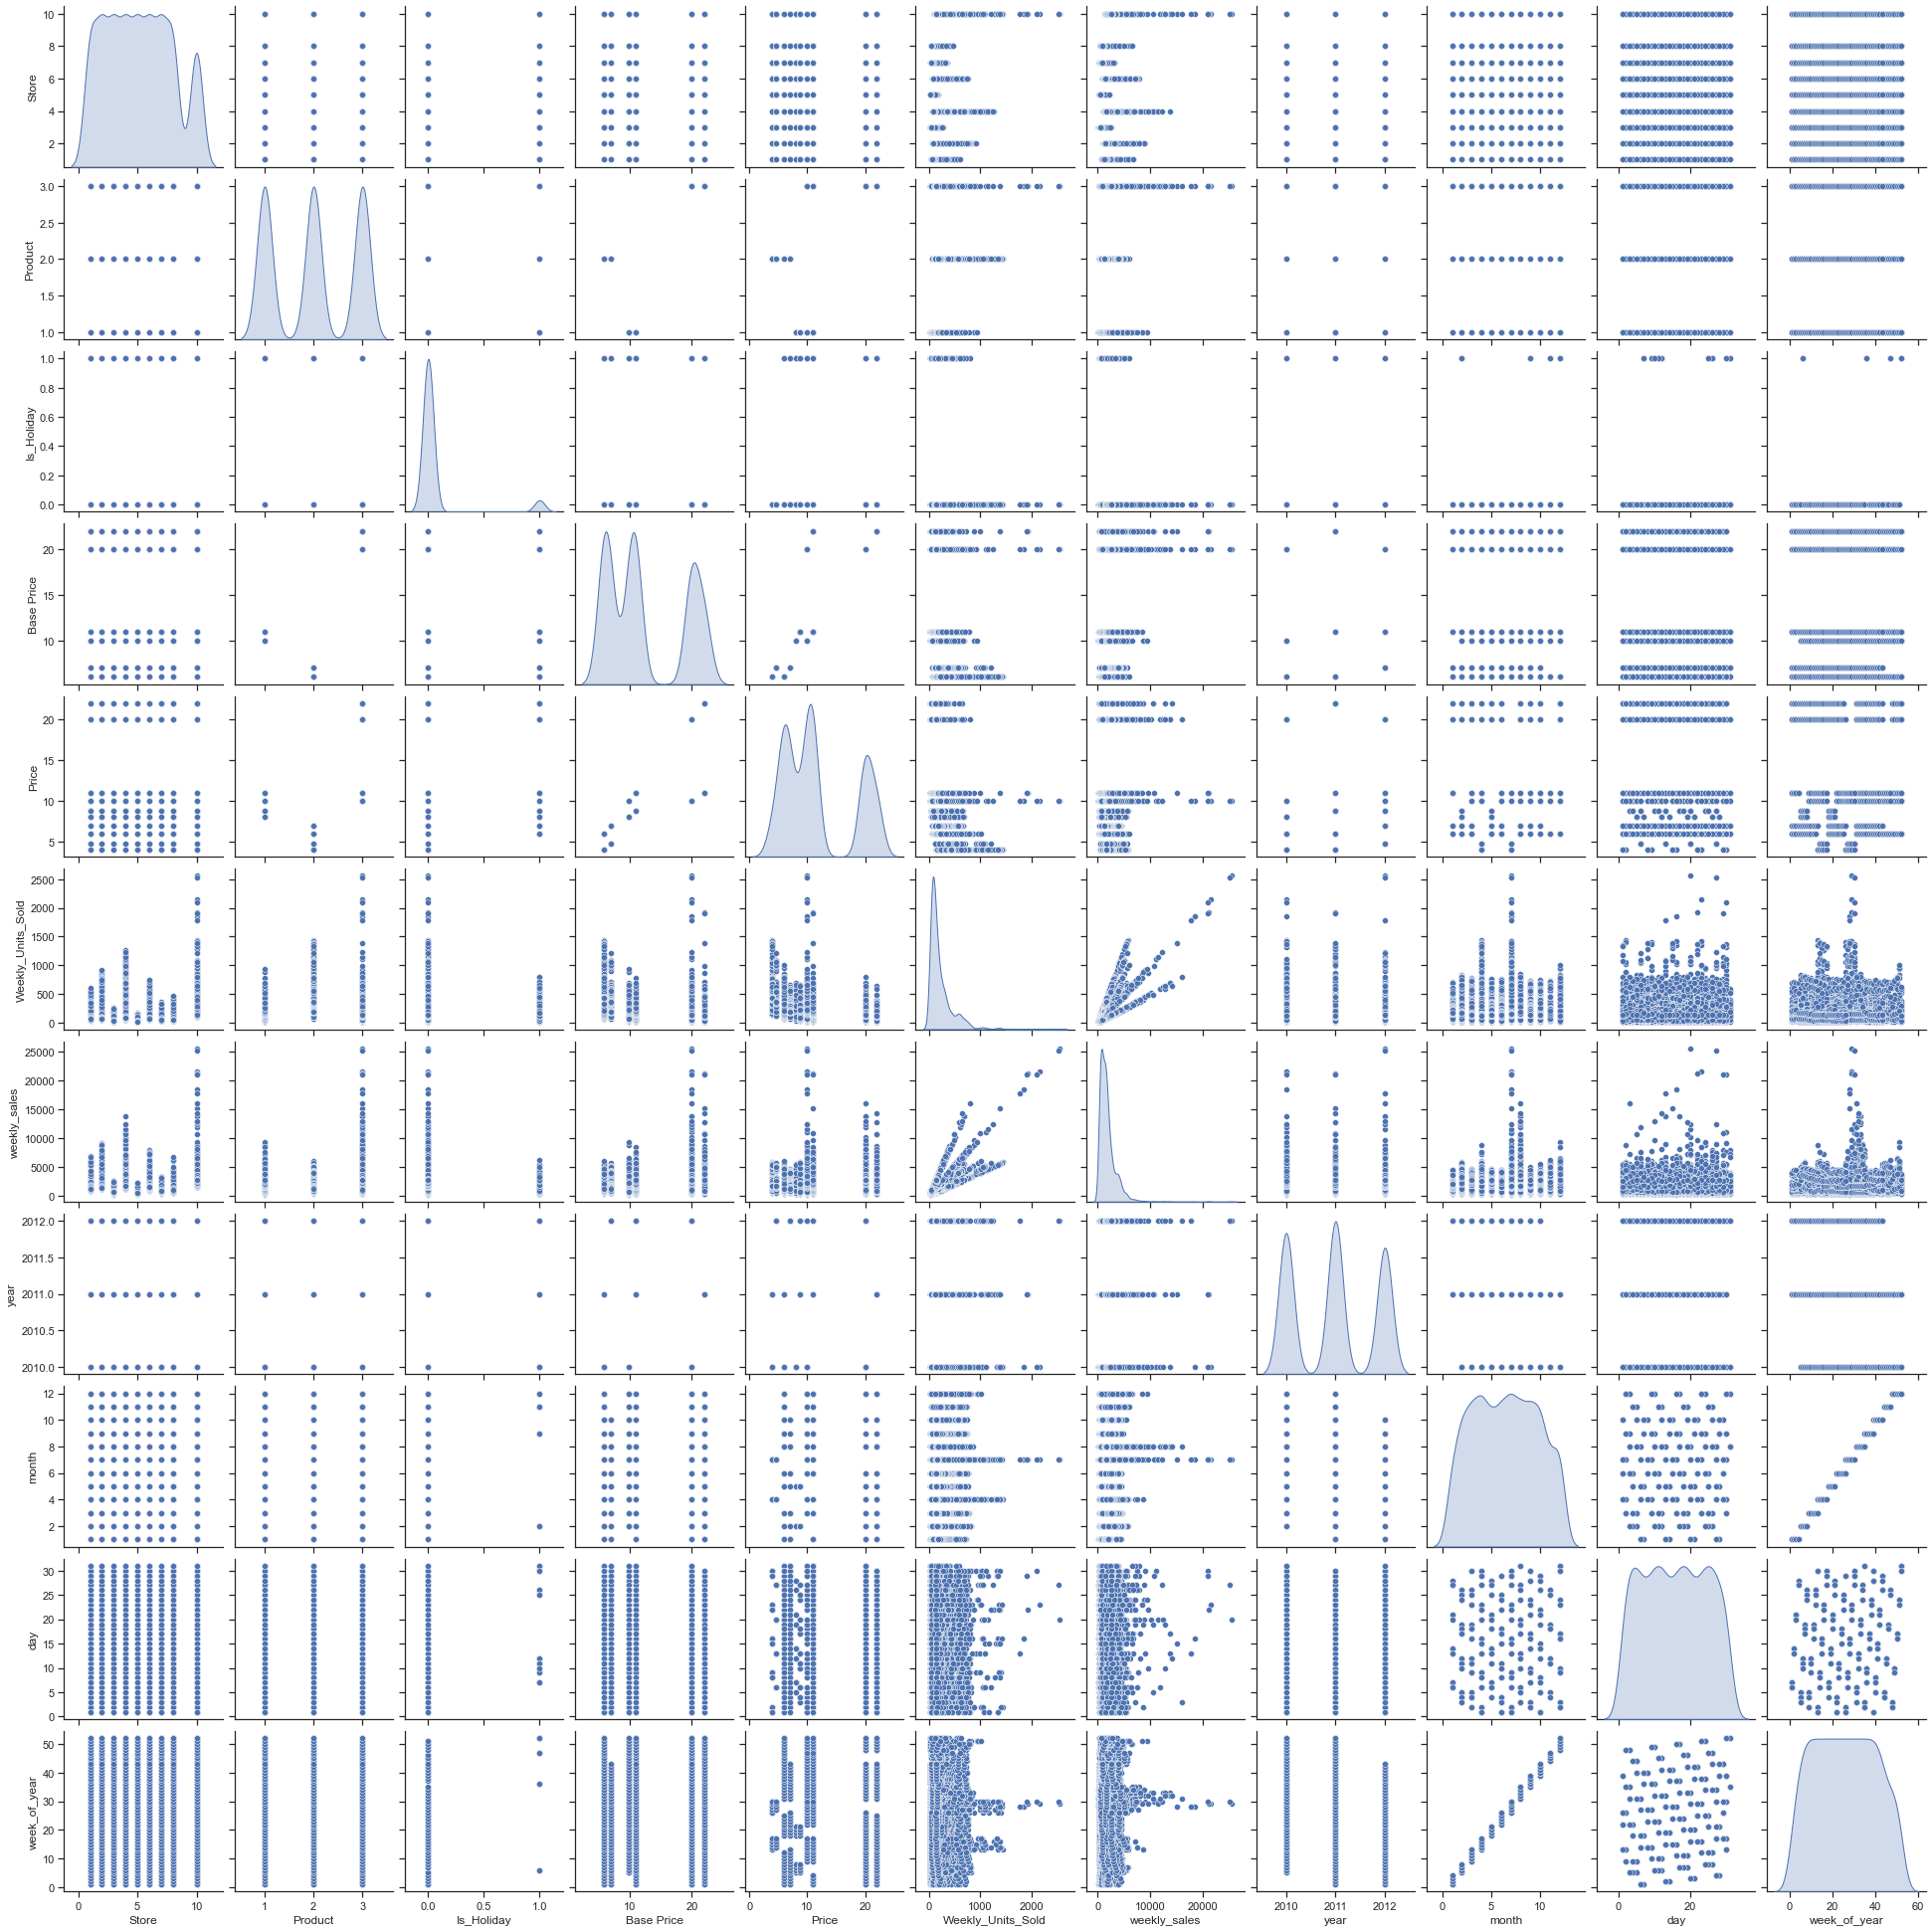

In [21]:
# Looking for correlation between features. 
sns.pairplot(data=df, diag_kind='kde')

In [22]:
# Add new column, Promotion. 
def f(row):

    # If base price and price are the same promotion is 0 or no. 
    if row['Base Price'] == row['Price']:
        val = 0

    #  If base price is higher than price promotion is 1 or yes.
    elif row['Base Price'] > row['Price']:
        val = 1

    # Hopefully there are no instances where price is higher than base price. 
    else:
        val = -1
    return val
df['promotion'] = df.apply(f, axis=1)
df.head()

,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales,year,month,day,week_of_year,promotion
Date,,,,,,,,,,,,
2010-02-05,1,1,False,9.99,7.99,245,1957.55,2010,2,5,5,1
2010-02-12,1,1,True,9.99,7.99,453,3619.47,2010,2,12,6,1
2010-02-19,1,1,False,9.99,7.99,409,3267.91,2010,2,19,7,1
2010-02-26,1,1,False,9.99,7.99,191,1526.09,2010,2,26,8,1
2010-03-05,1,1,False,9.99,9.99,145,1448.55,2010,3,5,9,0


In [23]:
# And there are no instances where price is higher than base price.
df[df['promotion']==-1]


,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales,year,month,day,week_of_year,promotion
Date,,,,,,,,,,,,


C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



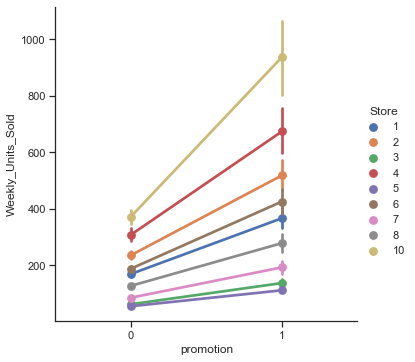

In [24]:
# Looking at units sold vs promotion per store. 
sns.factorplot(data= df, 
               x= 'promotion',
               y= 'Weekly_Units_Sold',
               hue= 'Store');

* Every store sells more during the promotions, there is no exception.

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



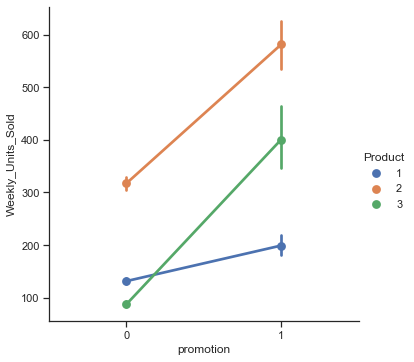

In [25]:
# Looking at units sold per product while on or off promotion. 
sns.factorplot(data= df, 
               x= 'promotion',
               y= 'Weekly_Units_Sold',
               hue= 'Product');


* Every product sells more during the promotions, in particular, product 2 and product 3.

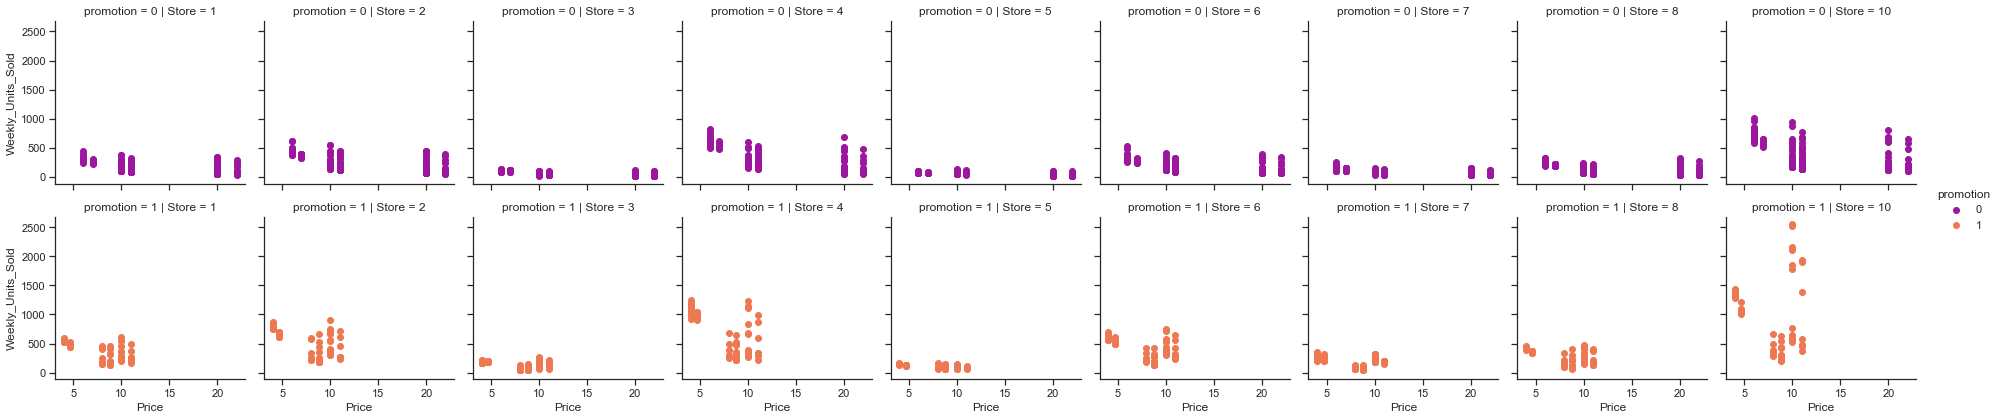

In [26]:
# Distribution of price and promotion distribution for units sold. 
g = sns.FacetGrid(df, col="Store", hue="promotion", palette = 'plasma', row='promotion')
g = (g.map(plt.scatter, "Price", "Weekly_Units_Sold")
     .add_legend())

* All the stores have the similar price promotion pattern, for some reason, store 10 sells the most during the promotions.

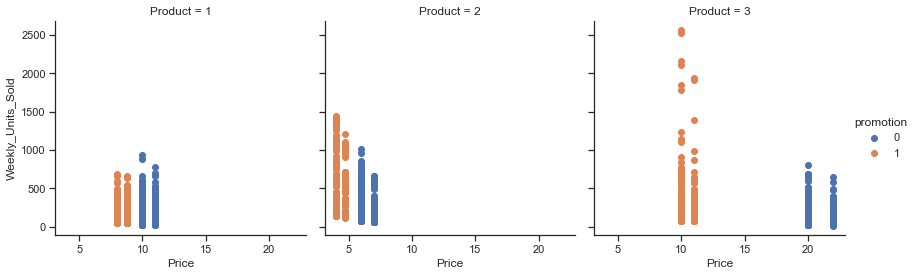

In [27]:
# Price change while on and off promotion and the change in sales.  
g = sns.FacetGrid(df, hue="promotion", col="Product", height=4)
g.map(plt.scatter, "Price", "Weekly_Units_Sold")
g.add_legend();

* Every product has the regular price and promotional price. Product 3 has the highest discount and sells the most during the promotions.

## Observations
* The most selling and crowded Store is Store 10, and the least crowded store is Store 5.
* In terms of number of units sold, the most selling product is product 2 throughout the year.
* Stores do not necessarily run product promotions during holidays. Holidays do not seem to have an impact on stores or products performance.
* Product 2 seems to be the cheapest product, and Product 3 is the most expensive product.
* Most stores have some kind of seasonality and they have two peak seasons per year.
* Product 1 sells a little more in February than the other months, Product 2 sells the most around April and July, and Product 3 sells the most around July to September.
* Each product has its regular price and promotional price. There isn’t significant gap between regular price and promotional price on Product 1 and Product 2, however, Product 3’s promotional price can be slashed to 50% of its original price. Although every store makes this kind of price cut for product 3, store 10 is the one made the highest sales during the price cut.
* It is nothing unusual to sell more during promotion than the normal days. Store 10’s made Product 3 the best selling product around July to September.

In [28]:
# Save to CSV
df.to_csv('Resources/sales.csv')

# Time Series

In [53]:
# Time series for store 10, product 3. 
store_10_pro_3 = df[(df.Store == 10) & (df.Product == 3)].loc[:, ['Base Price', 'Price', 'Weekly_Units_Sold', 'weekly_sales']]
store_10_pro_3.reset_index(level=0, inplace=True)
fig = px.line(store_10_pro_3, x='Date', y='weekly_sales')
fig.update_layout(title_text='Time Series of weekly sales')
fig.show()

In [54]:
# !conda install -c conda-forge fbprophet -y

In [55]:
# !pip install --upgrade plotly

In [56]:
from fbprophet import Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


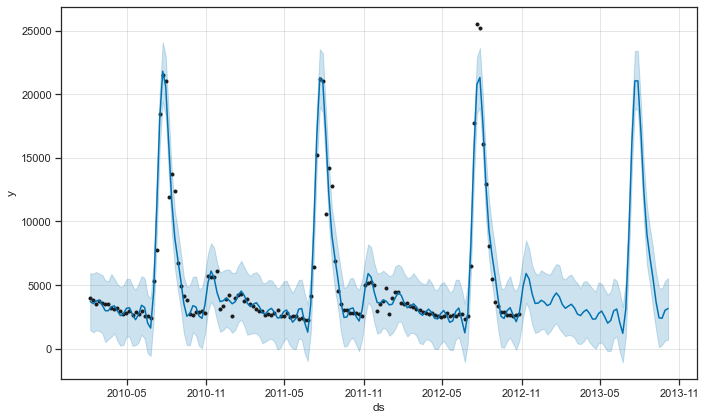

In [57]:

# Forecasting for store 10, product 3 for Date Vs Weekly sales for 2013. 
store_10_pro_3 = store_10_pro_3[['Date', 'weekly_sales']].rename(columns = {'Date': 'ds',
                                'weekly_sales': 'y'})
 
model = Prophet(interval_width = 0.95)
model.fit(store_10_pro_3) 
future_dates = model.make_future_dataframe(periods = 50, freq='W')
forecast = model.predict(future_dates)

model.plot(forecast);

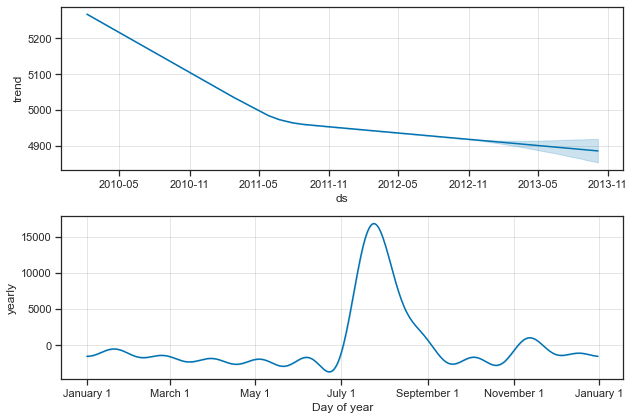

In [58]:
model.plot_components(forecast);

In [59]:
# Root Mean Square Error
metric_df = forecast.set_index('ds')[['yhat']].join(store_10_pro_3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(sqrt(error)))

The RMSE is 1190.0888340961621


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 720x360 with 0 Axes>

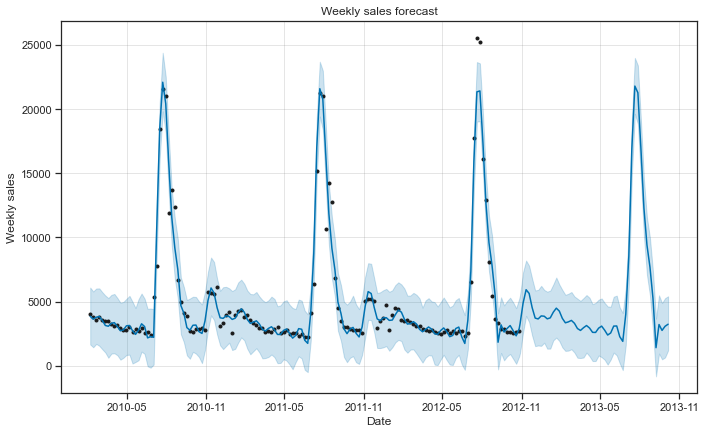

In [60]:
# Define a function to take into consideration whether or not school holiday season applies. 
def is_school_holiday_season(ds):    
    date = pd.to_datetime(ds)
    starts = datetime.date(date.year, 7, 1)
    ends = datetime.date(date.year, 9, 9)
    return starts < date.to_pydatetime().date() < ends

store_10_pro_3['school_holiday_season'] = store_10_pro_3['ds'].apply(is_school_holiday_season)
store_10_pro_3['not_school_holiday_season'] = ~store_10_pro_3['ds'].apply(is_school_holiday_season)
model = Prophet(interval_width=0.95)

model.add_seasonality(name='school_holiday_season', period=365, fourier_order=3, condition_name='school_holiday_season')
model.add_seasonality(name='not_school_holiday_season', period=365, fourier_order=3, condition_name='not_school_holiday_season')
model.fit(store_10_pro_3)

forecast = model.make_future_dataframe(periods=50, freq='W')
forecast['school_holiday_season'] = forecast['ds'].apply(is_school_holiday_season)
forecast['not_school_holiday_season'] = ~forecast['ds'].apply(is_school_holiday_season)
forecast = model.predict(forecast)

plt.figure(figsize=(10, 5))
model.plot(forecast, xlabel = 'Date', ylabel = 'Weekly sales')
plt.title('Weekly sales forecast');

In [61]:
# Root Mean Square Error 
metric_df = forecast.set_index('ds')[['yhat']].join(store_10_pro_3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(sqrt(error)))

The RMSE is 1126.127120797499


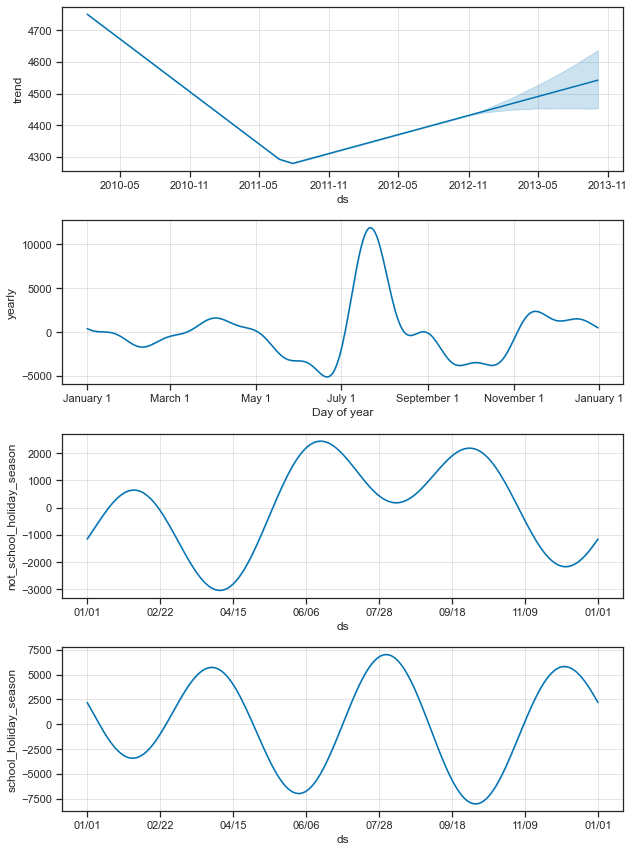

In [62]:
model.plot_components(forecast);